In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve


In [187]:
chips = pd.read_csv('chip_dataset.csv')

In [188]:
chips

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


In [189]:
chips.duplicated().sum()

0

In [190]:
chips.isna().sum()

Unnamed: 0                  0
Product                     0
Type                        0
Release Date                0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

In [191]:
# drop the columns Unnames: 0 and Product
chips.drop(['Unnamed: 0', 'Product'], axis=1, inplace=True)

In [192]:
chips["Release Date"] = pd.to_datetime(chips["Release Date"])
chips.dtypes

Type                             object
Release Date             datetime64[ns]
Process Size (nm)               float64
TDP (W)                         float64
Die Size (mm^2)                 float64
Transistors (million)           float64
Freq (MHz)                      float64
Foundry                          object
Vendor                           object
FP16 GFLOPS                     float64
FP32 GFLOPS                     float64
FP64 GFLOPS                     float64
dtype: object

In [193]:
# drop the rows with duplicated values
chips.drop_duplicates(inplace=True)
chips.duplicated().sum()

0

In [194]:
chips

,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4847,GPU,2003-09-15,130.0,NaN,NaN,25.0,200.0,UMC,Other,NaN,NaN,NaN
4849,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN


In [195]:
# fill in the missing values of Process Size (nm) with the mean of the column
chips["Process Size (nm)"].fillna(chips["Process Size (nm)"].mean(), inplace=True)

In [196]:
# fill in the missing values of TDP (W) with the mean of the column
chips['TDP (W)'].fillna(chips['TDP (W)'].mean(), inplace=True)

In [197]:
# fill in the missing values of Die Size (mm^2) with the mean of the column
chips['Die Size (mm^2)'].fillna(chips['Die Size (mm^2)'].mean(), inplace=True)

In [198]:
# fill in the missing values of Transistors (million) with the mean of the column
chips['Transistors (million)'].fillna(chips['Transistors (million)'].mean(), inplace=True)

In [199]:
# fill in the missing values of Release Date with the mean of the column
chips['Release Date'].fillna(chips['Release Date'].mean(), inplace=True)

In [200]:
chips.isna().sum()

Type                        0
Release Date                0
Process Size (nm)           0
TDP (W)                     0
Die Size (mm^2)             0
Transistors (million)       0
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              3683
FP32 GFLOPS              2429
FP64 GFLOPS              3002
dtype: int64

In [201]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4185 entries, 0 to 4852
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Type                   4185 non-null   object        
 1   Release Date           4185 non-null   datetime64[ns]
 2   Process Size (nm)      4185 non-null   float64       
 3   TDP (W)                4185 non-null   float64       
 4   Die Size (mm^2)        4185 non-null   float64       
 5   Transistors (million)  4185 non-null   float64       
 6   Freq (MHz)             4185 non-null   float64       
 7   Foundry                4185 non-null   object        
 8   Vendor                 4185 non-null   object        
 9   FP16 GFLOPS            502 non-null    float64       
 10  FP32 GFLOPS            1756 non-null   float64       
 11  FP64 GFLOPS            1183 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 425.

In [202]:
original_chips = chips.copy()

In [203]:
# get the unique values from the column "Type"
chips["Type"].unique()

array(['CPU', 'GPU'], dtype=object)

In [204]:
# label encode the features of "Type" to numerical values
chips["Type"] = chips["Type"].map({"CPU": 0, "GPU": 1})

In [205]:
# get the unique values from the column "Foundry"
chips["Foundry"].unique()

array(['Unknown', 'Intel', 'GF', 'TSMC', 'UMC', 'Samsung', 'Renesas',
       'Sony', 'NEC', 'IBM'], dtype=object)

In [206]:
# since we have a lot of unique values in the column "Foundry", we will use ordinal encoding with the OrdinalEncoder() function
# create an instance of the OrdinalEncoder() function
encoder = OrdinalEncoder()
chips["Foundry"] = encoder.fit_transform(chips[["Foundry"]])
chips["Foundry"]

0       9.0
1       9.0
2       2.0
3       2.0
4       9.0
       ... 
4847    8.0
4849    7.0
4850    2.0
4851    7.0
4852    7.0
Name: Foundry, Length: 4185, dtype: float64

In [207]:
# get the unique values from the column "Vendor"
chips["Vendor"].unique()

array(['AMD', 'Intel', 'Other', 'NVIDIA', 'ATI'], dtype=object)

In [208]:
# same as "Foundry"
encoder = OrdinalEncoder()
chips["Vendor"] = encoder.fit_transform(chips[["Vendor"]])
chips["Vendor"]

0       0.0
1       0.0
2       2.0
3       2.0
4       0.0
       ... 
4847    4.0
4849    3.0
4850    2.0
4851    3.0
4852    3.0
Name: Vendor, Length: 4185, dtype: float64

In [209]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4185 entries, 0 to 4852
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Type                   4185 non-null   int64         
 1   Release Date           4185 non-null   datetime64[ns]
 2   Process Size (nm)      4185 non-null   float64       
 3   TDP (W)                4185 non-null   float64       
 4   Die Size (mm^2)        4185 non-null   float64       
 5   Transistors (million)  4185 non-null   float64       
 6   Freq (MHz)             4185 non-null   float64       
 7   Foundry                4185 non-null   float64       
 8   Vendor                 4185 non-null   float64       
 9   FP16 GFLOPS            502 non-null    float64       
 10  FP32 GFLOPS            1756 non-null   float64       
 11  FP64 GFLOPS            1183 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 425.

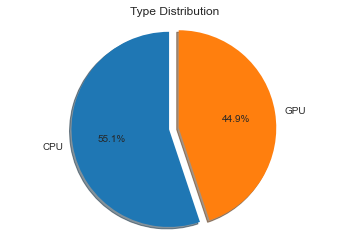

In [210]:
# create a pie chart for the "Type" feature
plt.style.use('seaborn-whitegrid')
labels = ['CPU', 'GPU']
sizes = chips['Type'].value_counts()
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Type Distribution")
plt.show()


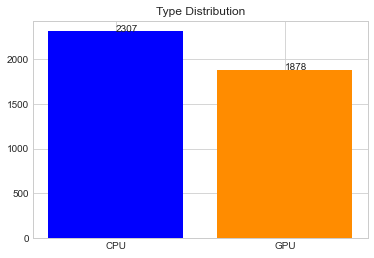

In [211]:
# bar chart for specific numbers
plt.style.use('seaborn-whitegrid')
labels = ['CPU', 'GPU']
sizes = chips['Type'].value_counts()
fig1, ax1 = plt.subplots()
ax1.bar(labels, sizes, color=['blue', 'darkorange'])
plt.title("Type Distribution")
for index, value in enumerate(sizes):
    plt.text(index, value, str(value))
plt.show()

In [212]:
chips.copy().groupby("Type").mean()

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
Type,,,,,,,,,,
0,51.547923,74.938232,171.975531,1355.906597,2497.246539,4.468051,1.164004,NaN,NaN,NaN
1,54.414836,87.248789,208.322399,2546.894492,681.876463,6.224534,1.723017,8357.939283,2202.250706,352.746262


In [213]:
chips_by_vendor = original_chips.groupby("Vendor")["Type"].value_counts().rename("Total").to_frame().reset_index()
chips_by_vendor


,Vendor,Type,Total
0,AMD,CPU,785
1,AMD,GPU,646
2,ATI,GPU,454
3,Intel,CPU,1093
4,Intel,GPU,137
5,NVIDIA,GPU,1033
6,Other,GPU,37


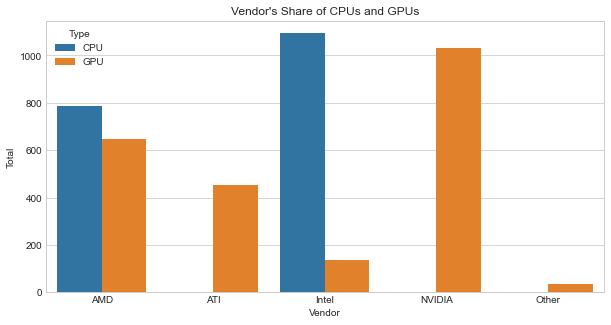

In [214]:
# chart of each vendor's share of CPUs and GPUs
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Vendor", y="Total", hue="Type", data=chips_by_vendor)
plt.title("Vendor's Share of CPUs and GPUs")
plt.show()

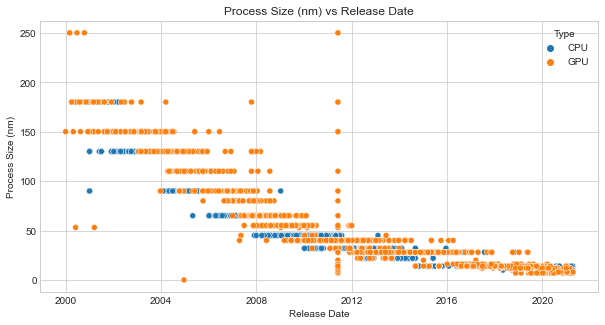

In [215]:
# relationship between "Process Size (nm)" and "Release Date"
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x="Release Date", y="Process Size (nm)", hue="Type", data=original_chips)
plt.title("Process Size (nm) vs Release Date")
plt.show()


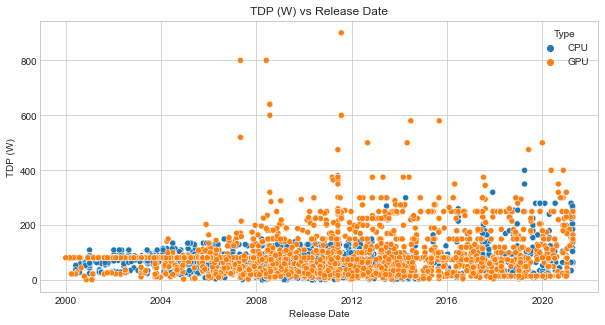

In [216]:
# relationship between "TDP (W)" and "Release Date"
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x="Release Date", y="TDP (W)", hue="Type", data=original_chips)
plt.title("TDP (W) vs Release Date")
plt.show()

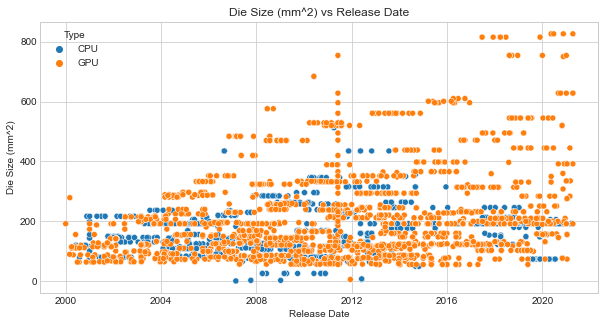

In [217]:
# relationship between "Die Size (mm^2)" and "Release Date"
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x="Release Date", y="Die Size (mm^2)", hue="Type", data=original_chips)
plt.title("Die Size (mm^2) vs Release Date")
plt.show()

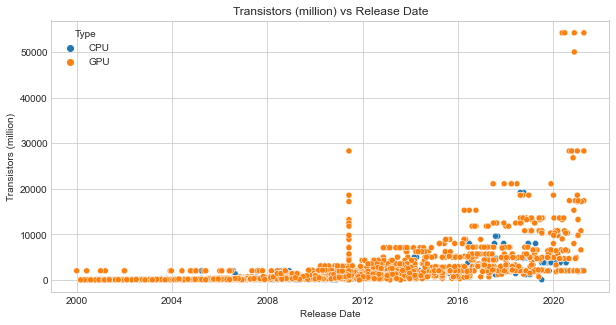

In [218]:
# relationship between "Transistors (million)" and "Release Date"
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x="Release Date", y="Transistors (million)", hue="Type", data=original_chips)
plt.title("Transistors (million) vs Release Date")
plt.show()

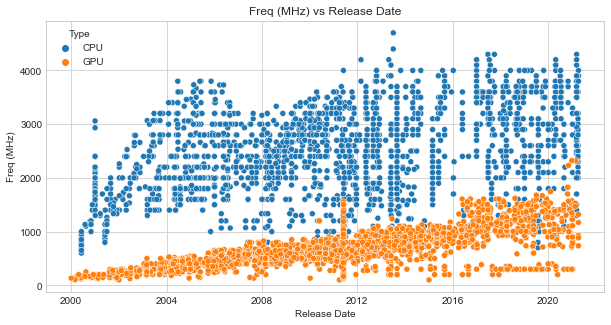

In [219]:
# relationship between "Freq (MHz)" and "Release Date"
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x="Release Date", y="Freq (MHz)", hue="Type", data=original_chips)
plt.title("Freq (MHz) vs Release Date")
plt.show()

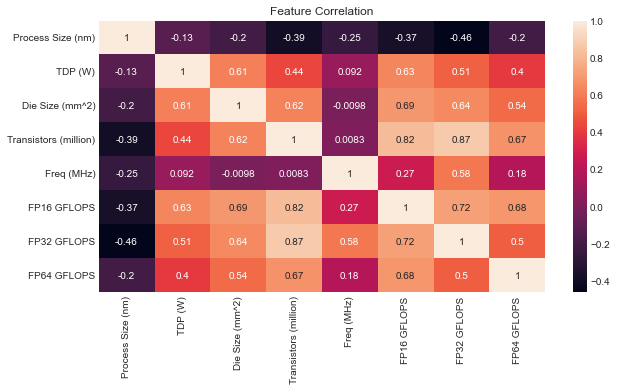

In [220]:
# feature correlation
plt.figure(figsize=(10, 5))
sns.heatmap(original_chips.corr(), annot=True)
plt.title("Feature Correlation")
plt.show()

# Case Study 0: Predicting The Microprocessor Type

In [221]:
# split the data into training and testing sets
X = chips[['Vendor', 'Foundry', 'Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']]
y = chips["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
# define a baseline
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)
print("Baseline accuracy: " + str(baseline_accuracy))

Baseline accuracy: 0.5017921146953405


In [ ]:
numerical_features = ['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']
categorical_features = ['Vendor', 'Foundry']

In [224]:
# kNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("kNN accuracy: " + str(knn_accuracy))

kNN accuracy: 0.989247311827957


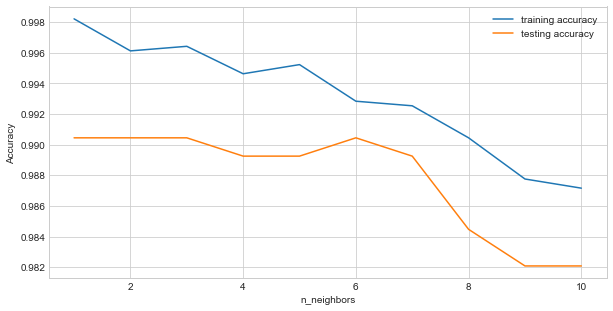

In [225]:
# training accuracy and testing accuracy
training_accuracy = []
testing_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))
# plot the training and testing accuracy
plt.figure(figsize=(10, 5))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, testing_accuracy, label="testing accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

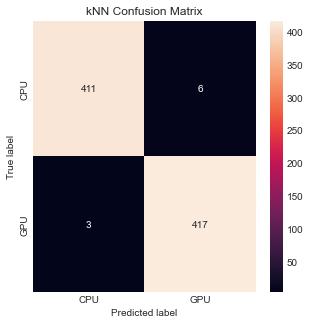

In [226]:
# kNN confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['CPU', 'GPU'], columns=['CPU', 'GPU'])
plt.figure(figsize=(5, 5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('kNN Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [227]:
# evaluate the model using cross-validation
knn_scores = cross_val_score(knn_clf, X, y, cv=10)
print("kNN cross-validation scores: " + str(knn_scores))
print("kNN cross-validation mean score: " + str(knn_scores.mean()))

kNN cross-validation scores: [0.99045346 0.98090692 0.98806683 0.99045346 1.         0.99760766
 0.99521531 0.99043062 0.98803828 0.99043062]
kNN cross-validation mean score: 0.9911603156296034


In [228]:
# evaluate the model using precision, recall, and f1-score
knn_precision = precision_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')
print("kNN precision: " + str(knn_precision))
print("kNN recall: " + str(knn_recall))
print("kNN f1-score: " + str(knn_f1))


kNN precision: 0.989272179284414
kNN recall: 0.989247311827957
kNN f1-score: 0.9892470355406342


In [229]:
# grid search for decision tree
param_grid = [
    {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]},
]
tree_clf = DecisionTreeClassifier()
model_tree = GridSearchCV(tree_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)
model_tree.fit(X_train, y_train)
print("Best parameters: " + str(model_tree.best_params_))
# show the results of the grid search
cvres = model_tree.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_tree.best_estimator_
# evaluate the model on the test set
y_pred = final_model.predict(X_test)
print("Decision Tree final model accuracy: " + str(accuracy_score(y_test, y_pred)))



Best parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean test score: 0.9462427384037895, Params: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean test score: 0.9462427384037895, Params: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4}
Mean test score: 0.9462427384037895, Params: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 6}
Mean test score: 0.9462427384037895, Params: {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean test score: 0.9462427384037895, Params: {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 4}
Mean test score: 0.9462427384037895, Params: {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 6}
Mean test score: 0.9462427384037895, Params: {'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 2}
Mean test score: 0.9462427384037895, Params: {'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 4}
Mean test score: 0.9462427384037895, Params: {'

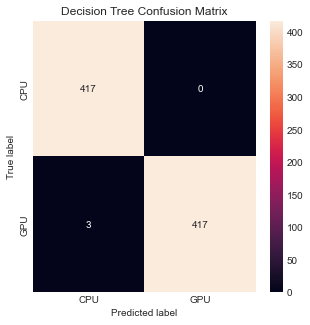

In [230]:
# decision tree confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['CPU', 'GPU'], columns=['CPU', 'GPU'])
plt.figure(figsize=(5, 5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [231]:
# evaluate the model using cross-validation
tree_scores = cross_val_score(final_model, X, y, cv=10)
print("Decision Tree cross-validation scores: " + str(tree_scores))
print("Decision Tree cross-validation mean score: " + str(tree_scores.mean()))

Decision Tree cross-validation scores: [0.99761337 0.9928401  0.98806683 0.99045346 0.9928401  0.99760766
 0.99760766 0.98803828 0.99043062 0.99521531]
Decision Tree cross-validation mean score: 0.9930713364013201


In [232]:
# evaluate the model using precision, recall, and f1-score
tree_precision = precision_score(y_test, y_pred, average='weighted')
tree_recall = recall_score(y_test, y_pred, average='weighted')
tree_f1 = f1_score(y_test, y_pred, average='weighted')
print("Decision Tree precision: " + str(tree_precision))
print("Decision Tree recall: " + str(tree_recall))
print("Decision Tree f1-score: " + str(tree_f1))

Decision Tree precision: 0.9964413722478239
Decision Tree recall: 0.996415770609319
Decision Tree f1-score: 0.996415770609319


In [233]:
# grid search for random forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
param_grid = [
    {'n_estimators': [3, 10, 30, 100, 300], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
model_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
model_rf.fit(X_train, y_train)
print("Best parameters: " + str(model_rf.best_params_))
# show the best model's accuracy
cvres = model_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_rf.best_estimator_
# predict the type of chip (CPU or GPU)
y_pred = final_model.predict(X_test)
print("Random Forest final model accuracy: " + str(accuracy_score(y_test, y_pred)))


Best parameters: {'max_features': 2, 'n_estimators': 10}
Mean test score: 0.99372732748812, Params: {'max_features': 2, 'n_estimators': 3}
Mean test score: 0.9970131405751511, Params: {'max_features': 2, 'n_estimators': 10}
Mean test score: 0.9970131405751511, Params: {'max_features': 2, 'n_estimators': 30}
Mean test score: 0.9964156794502822, Params: {'max_features': 2, 'n_estimators': 100}
Mean test score: 0.9964156794502822, Params: {'max_features': 2, 'n_estimators': 300}
Mean test score: 0.9949222497378578, Params: {'max_features': 4, 'n_estimators': 3}
Mean test score: 0.9964152332507863, Params: {'max_features': 4, 'n_estimators': 10}
Mean test score: 0.9961167257880998, Params: {'max_features': 4, 'n_estimators': 30}
Mean test score: 0.9961167257880998, Params: {'max_features': 4, 'n_estimators': 100}
Mean test score: 0.9961167257880998, Params: {'max_features': 4, 'n_estimators': 300}
Mean test score: 0.9952207572005444, Params: {'max_features': 6, 'n_estimators': 3}
Mean test

In [234]:
cv_results = pd.DataFrame(model_rf.cv_results_)
cv_results.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.015023,0.000012,0.002399,0.000489,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.998507,0.998507,...,0.997013,0.001889,1,0.998506,0.998506,0.99888,0.998507,0.999253,0.998731,0.000299
2,0.044807,0.004791,0.004799,0.000749,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",0.998507,0.998507,...,0.997013,0.001889,1,0.998506,0.998506,0.99888,0.998507,0.999253,0.998731,0.000299
20,0.019208,0.000411,0.002190,0.000406,4,10,False,"{'bootstrap': False, 'max_features': 4, 'n_est...",0.998507,0.997015,...,0.996416,0.002026,3,0.998506,0.998506,0.99888,0.998507,0.999253,0.998731,0.000299
3,0.135394,0.003724,0.011999,0.000634,2,100,NaN,"{'max_features': 2, 'n_estimators': 100}",0.998507,0.997015,...,0.996416,0.001523,3,0.998506,0.998506,0.99888,0.998507,0.999253,0.998731,0.000299
4,0.439199,0.030952,0.031599,0.000490,2,300,NaN,"{'max_features': 2, 'n_estimators': 300}",0.998507,0.997015,...,0.996416,0.001523,3,0.998506,0.998506,0.99888,0.998507,0.999253,0.998731,0.000299


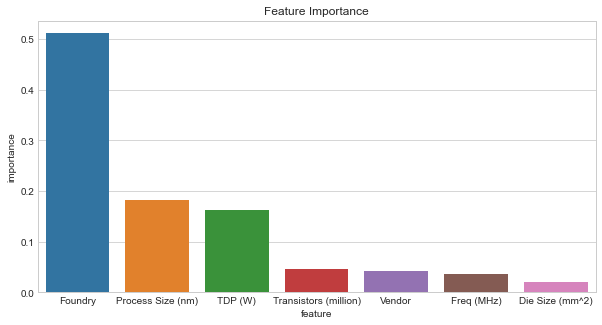

In [235]:
# get the feature importance
feature_importances = model_rf.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({"feature": numerical_features + categorical_features, "importance": feature_importances})
feature_importance_df.sort_values("importance", ascending=False, inplace=True)
# plot the feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="feature", y="importance", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()


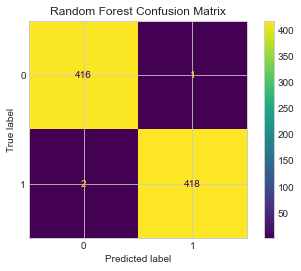

In [236]:
# random forest confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)
disp.ax_.set_title("Random Forest Confusion Matrix")
plt.show()


In [238]:
# evaluate the model using cross-validation
scores = cross_val_score(final_model, X, y, scoring="accuracy", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))


Cross-validation scores: [0.99761337 0.9928401  0.9928401  0.9928401  1.         1.
 1.         0.99521531 0.99282297 0.99760766]
Mean cross-validation score: 0.9961779584565666


In [239]:
# evaluate the model_rf using precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Random Forest Precision: " + str(precision))
print("Random Forest Recall: " + str(recall))
print("Randome Forest F1-score: " + str(f1))


Random Forest Precision: 0.9964186356680409
Random Forest Recall: 0.996415770609319
Randome Forest F1-score: 0.9964157808417153


In [240]:
# score on the training set and the test set
print("Training set accuracy: " + str(model_rf.score(X_train, y_train)))
print("Test set accuracy: " + str(model_rf.score(X_test, y_test)))
print("Baseline accuracy: " + str(baseline_accuracy))

Training set accuracy: 0.9985065710872163
Test set accuracy: 0.996415770609319
Baseline accuracy: 0.5017921146953405


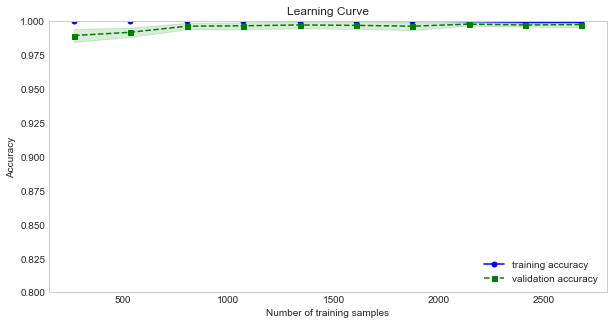

In [241]:
# check if the model is overfitting or underfitting
train_sizes, train_scores, test_scores = learning_curve(model_rf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring="accuracy")
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, color="blue", marker="o", markersize=5, label="training accuracy")
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color="blue")
plt.plot(train_sizes, test_mean, color="green", linestyle="--", marker="s", markersize=5, label="validation accuracy")
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color="green")
plt.grid()
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.8, 1.0])
plt.title("Learning Curve")
plt.show()


In [242]:
# grid search for logistic regression
log_clf = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
param_grid = [
    {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
]
model_log = GridSearchCV(log_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
model_log.fit(X_train, y_train)
print("Best parameters: " + str(model_log.best_params_))
# show the best model's accuracy
cvres = model_log.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_log.best_estimator_
# predict the type of chip (CPU or GPU)
y_pred = final_model.predict(X_test)
print("Logistic Regression final model accuracy: " + str(accuracy_score(y_test, y_pred)))

Best parameters: {'C': 10, 'penalty': 'l1'}
Mean test score: 0.9148776297882784, Params: {'C': 0.001, 'penalty': 'l1'}
Mean test score: 0.9599767976262186, Params: {'C': 0.001, 'penalty': 'l2'}
Mean test score: 0.9623653035272071, Params: {'C': 0.01, 'penalty': 'l1'}
Mean test score: 0.9671441001271669, Params: {'C': 0.01, 'penalty': 'l2'}
Mean test score: 0.9758052785400352, Params: {'C': 0.1, 'penalty': 'l1'}
Mean test score: 0.9701300671530243, Params: {'C': 0.1, 'penalty': 'l2'}
Mean test score: 0.9790897530285789, Params: {'C': 1, 'penalty': 'l1'}
Mean test score: 0.9740111103674453, Params: {'C': 1, 'penalty': 'l2'}
Mean test score: 0.9793887066907615, Params: {'C': 10, 'penalty': 'l1'}
Mean test score: 0.97221961939183, Params: {'C': 10, 'penalty': 'l2'}
Mean test score: 0.9793887066907615, Params: {'C': 100, 'penalty': 'l1'}
Mean test score: 0.9713240970037704, Params: {'C': 100, 'penalty': 'l2'}
Mean test score: 0.9793887066907615, Params: {'C': 1000, 'penalty': 'l1'}
Mean tes

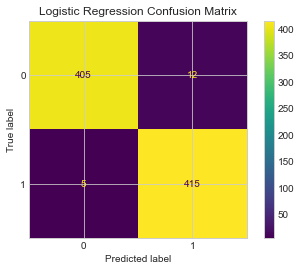

In [243]:
# logistic regression confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model_log, X_test, y_test)
disp.ax_.set_title("Logistic Regression Confusion Matrix")
plt.show()

In [244]:
# evaluate the model using cross-validation
scores = cross_val_score(final_model, X, y, scoring="accuracy", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [0.97852029 0.97136038 0.97613365 0.98329356 0.98806683 0.98564593
 0.98086124 0.9784689  0.97129187 0.98086124]
Mean cross-validation score: 0.9794503888273514


In [245]:
# evaluate the model_log using precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Logistic Regression Precision: " + str(precision))
print("Logistic Regression Recall: " + str(recall))
print("Logistic Regression F1-score: " + str(f1))

Logistic Regression Precision: 0.979822407954381
Logistic Regression Recall: 0.9796893667861409
Logistic Regression F1-score: 0.9796873370827208


In [246]:
# score on the training set and the test set
print("Training set accuracy: " + str(model_log.score(X_train, y_train)))
print("Test set accuracy: " + str(model_log.score(X_test, y_test)))
print("Baseline accuracy: " + str(baseline_accuracy))

Training set accuracy: 0.9790919952210275
Test set accuracy: 0.9796893667861409
Baseline accuracy: 0.5017921146953405


In [247]:
# random search for SVM
svm_clf = SVC(random_state=42)
param_grid = [
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
]
model_svm = RandomizedSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
model_svm.fit(X_train, y_train)
print("Best parameters: " + str(model_svm.best_params_))
# show the best model's accuracy
cvres = model_svm.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_svm.best_estimator_
# predict the type of chip (CPU or GPU)
y_pred = final_model.predict(X_test)
print("Support Vector Machine final model accuracy: " + str(accuracy_score(y_test, y_pred)))

Best parameters: {'kernel': 'linear', 'C': 0.01}
Mean test score: 0.9799852754166387, Params: {'kernel': 'linear', 'C': 100}
Mean test score: 0.9796867679539523, Params: {'kernel': 'linear', 'C': 0.001}
Mean test score: 0.6502393860294938, Params: {'kernel': 'rbf', 'gamma': 100, 'C': 100}
Mean test score: 0.5636200165093814, Params: {'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}
Mean test score: 0.9814800437275505, Params: {'kernel': 'linear', 'C': 0.01}
Mean test score: 0.9808812440041942, Params: {'kernel': 'linear', 'C': 0.1}
Mean test score: 0.6502393860294938, Params: {'kernel': 'rbf', 'gamma': 10, 'C': 10}
Mean test score: 0.6589005644423622, Params: {'kernel': 'rbf', 'gamma': 1, 'C': 100}
Mean test score: 0.5636200165093814, Params: {'kernel': 'rbf', 'gamma': 0.001, 'C': 0.1}
Mean test score: 0.7434268121277023, Params: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
Support Vector Machine final model accuracy: 0.983273596176822


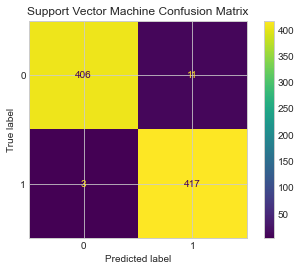

In [248]:
# support vector machine confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test)
disp.ax_.set_title("Support Vector Machine Confusion Matrix")
plt.show()

In [249]:
# evaluate the model using cross-validation
scores = cross_val_score(final_model, X, y, scoring="accuracy", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [0.97613365 0.97374702 0.97374702 0.98090692 0.98806683 0.98803828
 0.98803828 0.98325359 0.97607656 0.98803828]
Mean cross-validation score: 0.9816046408057462


In [250]:
# evaluate the model_svm using precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Support Vector Machine Precision: " + str(precision))
print("Support Vector Machine Recall: " + str(recall))
print("Support Vector Machine F1-score: " + str(f1))

Support Vector Machine Precision: 0.9834491371207097
Support Vector Machine Recall: 0.983273596176822
Support Vector Machine F1-score: 0.9832714947738108


In [251]:
# score on the training set and the test set
print("Training set accuracy: " + str(model_svm.score(X_train, y_train)))
print("Test set accuracy: " + str(model_svm.score(X_test, y_test)))
print("Baseline accuracy: " + str(baseline_accuracy))

Training set accuracy: 0.9811827956989247
Test set accuracy: 0.983273596176822
Baseline accuracy: 0.5017921146953405


In [252]:
# random search for neural network
nn_clf = MLPClassifier(random_state=42)
param_grid = [
    {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'max_iter': [1000, 5000]},
]
model_nn = RandomizedSearchCV(nn_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
model_nn.fit(X_train, y_train)
print("Best parameters: " + str(model_nn.best_params_))
# show the best model's accuracy
cvres = model_nn.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_nn.best_estimator_
# predict the type of chip (CPU or GPU)
y_pred = final_model.predict(X_test)
print("Neural Network final model accuracy: " + str(accuracy_score(y_test, y_pred)))

Best parameters: {'max_iter': 1000, 'learning_rate': 'constant', 'alpha': 0.01, 'activation': 'tanh'}
Mean test score: 0.9330906008076211, Params: {'max_iter': 1000, 'learning_rate': 'constant', 'alpha': 0.0001, 'activation': 'identity'}
Mean test score: 0.9683394685764004, Params: {'max_iter': 1000, 'learning_rate': 'invscaling', 'alpha': 0.001, 'activation': 'tanh'}
Mean test score: 0.9707297592753721, Params: {'max_iter': 1000, 'learning_rate': 'constant', 'alpha': 0.01, 'activation': 'tanh'}
Mean test score: 0.9459482854784375, Params: {'max_iter': 1000, 'learning_rate': 'invscaling', 'alpha': 0.001, 'activation': 'identity'}
Mean test score: 0.9330906008076211, Params: {'max_iter': 5000, 'learning_rate': 'adaptive', 'alpha': 0.0001, 'activation': 'identity'}
Mean test score: 0.9459482854784375, Params: {'max_iter': 5000, 'learning_rate': 'constant', 'alpha': 0.001, 'activation': 'identity'}
Mean test score: 0.9707284206768845, Params: {'max_iter': 1000, 'learning_rate': 'invscalin

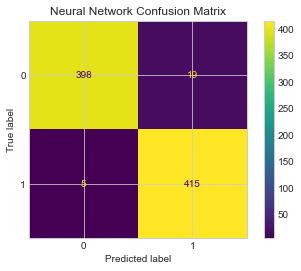

In [253]:
# neural network confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model_nn, X_test, y_test)
disp.ax_.set_title("Neural Network Confusion Matrix")
plt.show()

In [254]:
# evaluate the model using cross-validation
scores = cross_val_score(final_model, X, y, scoring="accuracy", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [0.97374702 0.95704057 0.96897375 0.96897375 0.97374702 0.97607656
 0.97607656 0.96650718 0.97607656 0.98325359]
Mean cross-validation score: 0.9720472530860672


In [255]:
# evaluate the model_nn using precision, recall, and f1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Neural Network Precision: " + str(precision))
print("Neural Network Recall: " + str(recall))
print("Neural Network F1-score: " + str(f1))

Neural Network Precision: 0.9718509031724432
Neural Network Recall: 0.9713261648745519
Neural Network F1-score: 0.9713164196686919


In [256]:
# score on the training set and the test set
print("Training set accuracy: " + str(model_nn.score(X_train, y_train)))
print("Test set accuracy: " + str(model_nn.score(X_test, y_test)))
print("Baseline accuracy: " + str(baseline_accuracy))

Training set accuracy: 0.9743130227001194
Test set accuracy: 0.9713261648745519
Baseline accuracy: 0.5017921146953405


# Case Study 1: Predicting The Power Consumption Using TDP

In [257]:
# split the data into training and testing sets
X_1 = chips[['Type', 'Vendor', 'Foundry', 'Process Size (nm)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']]
y_1 = chips['TDP (W)']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
# scale the data with a standard scaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [258]:
# define a baseline regression model and find the performance using MAE
baseline_model = DummyRegressor(strategy="mean")
baseline_model.fit(X_train1, y_train1)
y_pred1 = baseline_model.predict(X_test1)
baseline_mae = mean_absolute_error(y_test1, y_pred1)
print("Baseline MAE: " + str(baseline_mae))

Baseline MAE: 43.79177944709224


In [259]:
# r2 score for dummy regressor
print("Baseline R2 score: " + str(r2_score(y_test1, y_pred1)))

Baseline R2 score: -0.0008126340608201055


In [260]:
# grid search for k-nearest neighbors
knn_reg = KNeighborsRegressor()
param_grid = [
    {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
]
model_knn = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_knn.fit(X_train1, y_train1)
print("Best parameters: " + str(model_knn.best_params_))
# show the best model's accuracy
cvres = model_knn.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_knn.best_estimator_
# predict the power consumption TDP
y_pred1 = final_model.predict(X_test1)
print("kNN final model MAE: " + str(mean_absolute_error(y_test1, y_pred1)))

Best parameters: {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 3, 'weights': 'distance'}
Mean test score: -24.836492538364936, Params: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}
Mean test score: -24.836492538364936, Params: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'distance'}
Mean test score: -23.767188458521883, Params: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'uniform'}
Mean test score: -23.48344834378691, Params: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'distance'}
Mean test score: -23.898865965815403, Params: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'uniform'}
Mean test score: -23.373887918727114, Params: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
Mean test score: -24.307468272863478, Params: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'uniform'}
Mean test score: -23.

In [261]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_1, y_1, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [22.87116333 24.66274597 24.03572155 21.75319919 22.55158515 25.92610835
 22.63245357 21.52107426 23.16190395 27.29865602]
Mean cross-validation score: 23.641461132646587


In [262]:
# evaluate the model_knn using r2-score
r2 = r2_score(y_test1, y_pred1)
print("kNN R2-score: " + str(r2))

kNN R2-score: 0.6013278907042887


In [263]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_knn.score(X_train1, y_train1)))
print("Test set MAE: " + str(-model_knn.score(X_test1, y_test1)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 9.553046021153571
Test set MAE: 20.9636709702965
Baseline MAE: 43.79177944709224


In [264]:
# grid search for decision tree
tree_reg = DecisionTreeRegressor()
param_grid = [
    {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [3, 5, 7, 9], 'min_samples_leaf': [2, 4, 6, 8, 10], 'max_features': ['auto', 'sqrt']},
]
model_tree = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_tree.fit(X_train1, y_train1)
print("Best parameters: " + str(model_tree.best_params_))
# show the best model's accuracy
cvres = model_tree.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_tree.best_estimator_
# predict the power consumption TDP
y_pred1 = final_model.predict(X_test1)
print("Decision Tree final model MAE: " + str(mean_absolute_error(y_test1, y_pred1)))

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 7}
Mean test score: -38.08106103872343, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3}
Mean test score: -38.08106103872343, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean test score: -38.081061038723426, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 7}
Mean test score: -38.081061038723426, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 9}
Mean test score: -38.08106103872342, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 3}
Mean test score: -38.08106103872342, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5}
Mean test score: -38.08106103872342, Params: {'max_depth': 2, 'max_features': 'auto', 'min_sam

In [265]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_1, y_1, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [22.73176375 21.43953458 22.66635488 21.2501917  24.34353861 30.19516854
 26.75091649 26.30443483 26.83736874 29.90626599]
Mean cross-validation score: 25.242553809685802


In [266]:
# evaluate the model_tree using r2-score
r2 = r2_score(y_test1, y_pred1)
print("Decision Tree R2-score: " + str(r2))

Decision Tree R2-score: 0.5804433152035582


In [267]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_tree.score(X_train1, y_train1)))
print("Test set MAE: " + str(-model_tree.score(X_test1, y_test1)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 20.120446174189635
Test set MAE: 24.778583989124318
Baseline MAE: 43.79177944709224


In [268]:
# grid search for random forest
forest_reg = RandomForestRegressor()
param_grid = [
    {'n_estimators': [2, 4, 6, 8, 10], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [3, 5, 7, 9], 'min_samples_leaf': [1, 3, 5, 7, 9], 'max_features': ['auto', 'sqrt']},
]
model_forest = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_forest.fit(X_train1, y_train1)
print("Best parameters: " + str(model_forest.best_params_))
# show the best model's accuracy
cvres = model_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_forest.best_estimator_
# predict the power consumption TDP
y_pred1 = final_model.predict(X_test1)
print("Random Forest final model MAE: " + str(mean_absolute_error(y_test1, y_pred1)))

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 10}
Mean test score: -37.814425593707746, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 2}
Mean test score: -38.079329759747615, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 4}
Mean test score: -37.8074920292281, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6}
Mean test score: -37.73141530510278, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 8}
Mean test score: -37.512574456085716, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}
Mean test score: -38.64594483436517, Params: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'm

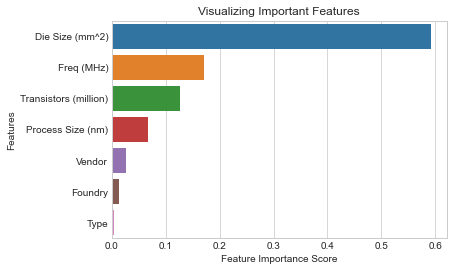

In [269]:
# feature importance
feature_importances = pd.DataFrame(final_model.feature_importances_, index = X_1.columns, columns=['importance']).sort_values('importance', ascending=False)
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [270]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_1, y_1, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [20.41248562 21.5391509  22.4429693  20.18244938 22.75585648 29.43074168
 26.44398448 24.303053   24.60013144 28.94580545]
Mean cross-validation score: 24.10566277317826


In [271]:
# evaluate the model_forest using r2-score
print("Random Forest R2-score: " + str(r2_score(y_test1, y_pred1)))

Random Forest R2-score: 0.6835207674711191


In [272]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_forest.score(X_train1, y_train1)))
print("Test set MAE: " + str(-model_forest.score(X_test1, y_test1)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 20.91423674590235
Test set MAE: 23.420201996066105
Baseline MAE: 43.79177944709224


In [273]:
# grid search for linear regression
lin_reg = LinearRegression()
param_grid = [
    {'fit_intercept': [True, False], 'copy_X': [True, False]},
]
model_lin = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_lin.fit(X_train1, y_train1)
print("Best parameters: " + str(model_lin.best_params_))
# show the best model's accuracy
cvres = model_lin.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_lin.best_estimator_
# predict the power consumption TDP
y_pred1 = final_model.predict(X_test1)
print("Linear Regression final model MAE: " + str(mean_absolute_error(y_test1, y_pred1)))

Best parameters: {'copy_X': True, 'fit_intercept': True}
Mean test score: -35.419393054617714, Params: {'copy_X': True, 'fit_intercept': True}
Mean test score: -82.91164387956108, Params: {'copy_X': True, 'fit_intercept': False}
Mean test score: -35.419393054617714, Params: {'copy_X': False, 'fit_intercept': True}
Mean test score: -82.91164387956108, Params: {'copy_X': False, 'fit_intercept': False}
Linear Regression final model MAE: 34.349498034152425


In [274]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_1, y_1, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [32.11151644 34.35575188 32.6133207  32.90492443 34.03019742 40.40209679
 35.55941341 34.88859797 33.89361577 40.89606289]
Mean cross-validation score: 35.16554976843546


In [275]:
# evaluate the model_lin using r2-score
print("Linear Regression R2-score: " + str(r2_score(y_test1, y_pred1)))

Linear Regression R2-score: 0.403135140580977


In [276]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_lin.score(X_train1, y_train1)))
print("Test set MAE: " + str(-model_lin.score(X_test1, y_test1)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 35.27556584581662
Test set MAE: 34.349498034152425
Baseline MAE: 43.79177944709224


In [281]:
# random search for neural network
nn_reg = MLPRegressor()
param_grid = [
    {'hidden_layer_sizes': [(10,), (100,), (100, 100)], 'solver': ['sgd'], 'activation': ['relu', 'tanh'], 'alpha': [0.01, 0.001, 0.0001], 'max_iter': [5000, 10000]},
]
model_nn = RandomizedSearchCV(nn_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_nn.fit(X_train1, y_train1)
print("Best parameters: " + str(model_nn.best_params_))
# show the best model's accuracy
cvres = model_nn.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_nn.best_estimator_
# predict the power consumption TDP
y_pred1 = final_model.predict(X_test1)
print("Neural Network final model MAE: " + str(mean_absolute_error(y_test1, y_pred1)))

Best parameters: {'solver': 'sgd', 'max_iter': 10000, 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
Mean test score: -25.0020061263293, Params: {'solver': 'sgd', 'max_iter': 10000, 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'tanh'}
Mean test score: -24.740414325528924, Params: {'solver': 'sgd', 'max_iter': 10000, 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
Mean test score: -24.833682289699027, Params: {'solver': 'sgd', 'max_iter': 5000, 'hidden_layer_sizes': (100, 100), 'alpha': 0.01, 'activation': 'tanh'}
Mean test score: -27.074162692351354, Params: {'solver': 'sgd', 'max_iter': 10000, 'hidden_layer_sizes': (100, 100), 'alpha': 0.01, 'activation': 'relu'}
Mean test score: -25.175735867427143, Params: {'solver': 'sgd', 'max_iter': 10000, 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'tanh'}
Mean test score: -28.72213167555571, Params: {'solver': 'sgd', 'max_iter': 5000, 'hidden_layer_sizes': (100,), 'alpha':

In [282]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_1, y_1, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [42.0395061  42.07372377 39.32340709 41.16135672 43.77701362 56.02180672
 50.93310404 49.53766286 51.40651861 57.62948608]
Mean cross-validation score: 47.39035855953971


In [283]:
# evaluate the model_nn using r2-score
print("Neural Network R2-score: " + str(r2_score(y_test1, y_pred1)))

Neural Network R2-score: 0.6794604946808336


In [284]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_nn.score(X_train1, y_train1)))
print("Test set MAE: " + str(-model_nn.score(X_test1, y_test1)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 22.324900307539195
Test set MAE: 23.488605426206913
Baseline MAE: 43.79177944709224


In [285]:
# grid search for gradient boosting
gb_reg = GradientBoostingRegressor()
param_grid = [
    {'n_estimators': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [1, 3, 5, 7]},
]
model_gb = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_gb.fit(X_train1, y_train1)
print("Best parameters: " + str(model_gb.best_params_))
# show the best model's accuracy
cvres = model_gb.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_gb.best_estimator_
# predict the power consumption TDP
y_pred1 = final_model.predict(X_test1)
print("Gradient Boosting final model MAE: " + str(mean_absolute_error(y_test1, y_pred1)))


Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}
Mean test score: -40.386376126751976, Params: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
Mean test score: -35.69250964407857, Params: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
Mean test score: -34.28363567338587, Params: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 1000}
Mean test score: -36.53152100749745, Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Mean test score: -29.460523440790816, Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Mean test score: -27.111727929613927, Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Mean test score: -33.29842536810686, Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Mean test score: -25.74297331508227, Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Mean test score: -24.272939340093217, Params: {'learning_rate': 0.01

In [286]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_1, y_1, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [17.95889402 19.93028175 20.45135227 18.40459212 21.0534507  28.42811536
 23.05205951 21.76285973 23.76065748 27.60569608]
Mean cross-validation score: 22.240795899938778


In [287]:
# evaluate the model_gb using r2-score
print("Gradient Boosting R2-score: " + str(r2_score(y_test1, y_pred1)))

Gradient Boosting R2-score: 0.6603455011842967


In [288]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_gb.score(X_train1, y_train1)))
print("Test set MAE: " + str(-model_gb.score(X_test1, y_test1)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 15.43846794394562
Test set MAE: 21.207870194360197
Baseline MAE: 43.79177944709224


# Case Study 2: Predicting The Performance Of GPU's Using FP32 GFLOPS


In [289]:
# separate chips into two groups: GPU and CPU
chips_gpu = chips[chips['Type'] == 1]
chips_cpu = chips[chips['Type'] == 0]
chips_gpu

,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
2192,1,2011-04-03,32.0,95.000000,216.000000,1160.00000,100.0,2.0,2.0,NaN,NaN,NaN
2193,1,2002-06-25,150.0,81.724482,174.000000,80.00000,200.0,8.0,4.0,NaN,NaN,NaN
2194,1,2019-02-23,14.0,25.000000,132.000000,3300.00000,1469.0,5.0,3.0,18.38,1177.0,36.77
2195,1,2008-03-02,130.0,81.724482,192.011905,2012.44401,200.0,2.0,2.0,NaN,12.8,NaN
2196,1,2008-09-30,55.0,20.000000,73.000000,242.00000,600.0,7.0,1.0,NaN,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4847,1,2003-09-15,130.0,81.724482,192.011905,25.00000,200.0,8.0,4.0,NaN,NaN,NaN
4849,1,2011-02-22,40.0,75.000000,332.000000,1950.00000,450.0,7.0,3.0,NaN,432.0,36.00
4850,1,2005-06-01,90.0,7.000000,192.011905,2012.44401,250.0,2.0,2.0,NaN,NaN,NaN
4851,1,2010-03-03,40.0,23.000000,100.000000,486.00000,500.0,7.0,3.0,NaN,52.8,NaN


In [290]:
chips_gpu.isna().sum()

Type                        0
Release Date                0
Process Size (nm)           0
TDP (W)                     0
Die Size (mm^2)             0
Transistors (million)       0
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              1805
FP32 GFLOPS               551
FP64 GFLOPS              1124
dtype: int64

In [291]:
# remove from chips_gpu the rows of chips_gpu that have FP32 GFLOPS as NaN
chips_gpu = chips_gpu[chips_gpu['FP32 GFLOPS'].notna()]
chips_gpu

,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
2194,1,2019-02-23,14.0,25.000000,132.000000,3300.00000,1469.0,5.0,3.0,18.38,1177.0,36.77
2195,1,2008-03-02,130.0,81.724482,192.011905,2012.44401,200.0,2.0,2.0,NaN,12.8,NaN
2196,1,2008-09-30,55.0,20.000000,73.000000,242.00000,600.0,7.0,1.0,NaN,96.0,NaN
2200,1,2007-12-12,80.0,200.000000,420.000000,720.00000,600.0,7.0,1.0,NaN,384.0,NaN
2201,1,2008-06-03,65.0,20.000000,144.000000,314.00000,450.0,9.0,3.0,NaN,35.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4839,1,2019-01-07,28.0,55.000000,123.000000,1500.00000,925.0,7.0,0.0,NaN,1184.0,74.00
4840,1,2019-01-29,12.0,65.000000,445.000000,10800.00000,1005.0,7.0,3.0,11980.00,5990.0,187.20
4844,1,2010-04-26,40.0,150.000000,334.000000,2154.00000,700.0,7.0,1.0,NaN,2016.0,403.20
4849,1,2011-02-22,40.0,75.000000,332.000000,1950.00000,450.0,7.0,3.0,NaN,432.0,36.00


In [292]:
# split the data into training and testing sets
X_2 = chips_gpu[['Type', 'Vendor', 'Foundry', 'Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)']]
y_2 = chips_gpu['FP32 GFLOPS']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
# scale the data using StandardScaler
scaler1 = StandardScaler()
X_train2 = scaler1.fit_transform(X_train2)
X_test2 = scaler1.transform(X_test2)

In [293]:
# define a baseline regression model and find the performance using MAE
baseline_reg = DummyRegressor(strategy="mean")
baseline_reg.fit(X_train2, y_train2)
y_pred2 = baseline_reg.predict(X_test2)
baseline_mae = mean_absolute_error(y_test2, y_pred2)
print("Baseline MAE: " + str(baseline_mae))

Baseline MAE: 2295.8572134809638


In [294]:
# r2-score for dummy regressor
print("Dummy Regressor R2-score: " + str(r2_score(y_test2, y_pred2)))

Dummy Regressor R2-score: -1.3938405655444797e-05


In [295]:
# grid search for k-nearest neighbors
knn_reg = KNeighborsRegressor()
param_grid = [
    {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
]
model_knn = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_knn.fit(X_train2, y_train2)
print("Best parameters: " + str(model_knn.best_params_))
# show the best model's accuracy
cvres = model_knn.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_knn.best_estimator_
# predict the performance of GPU chips
y_pred2 = final_model.predict(X_test2)
print("KNN final model MAE: " + str(mean_absolute_error(y_test2, y_pred2)))

Best parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}
Mean test score: -370.05604745805795, Params: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
Mean test score: -370.05604745805795, Params: {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'distance'}
Mean test score: -391.93565621928485, Params: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Mean test score: -345.6825781768063, Params: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Mean test score: -423.38451855109304, Params: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Mean test score: -343.79239677426966, Params: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Mean test score: -472.00650486600335, Params: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Mean test score: -356.780489966817, Params: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Mean test score: -499.2668429701181, Params: {'algorit

In [296]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_2, y_2, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [244.13169946 356.22366168 326.76942413 322.45925437 281.30481688
 235.03118098 339.3050684  230.62909361 223.82551727 264.89488173]
Mean cross-validation score: 282.4574598516035


In [297]:
# evaluate the model_knn using r2-score
print("KNN R2-score: " + str(r2_score(y_test2, y_pred2)))

KNN R2-score: 0.9543952737730802


In [298]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_knn.score(X_train2, y_train2)))
print("Test set MAE: " + str(-model_knn.score(X_test2, y_test2)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 37.99945631528965
Test set MAE: 304.1863448292503
Baseline MAE: 2295.8572134809638


In [299]:
# grid search for decision tree
tree_reg = DecisionTreeRegressor()
param_grid = [
    {'max_depth': [1, 3, 5, 7, 9, 11], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]},
]
model_tree = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_tree.fit(X_train2, y_train2)
print("Best parameters: " + str(model_tree.best_params_))
# show the best model's accuracy
cvres = model_tree.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_tree.best_estimator_
# predict the performance of GPU chips
y_pred2 = final_model.predict(X_test2)
print("Decision Tree final model MAE: " + str(mean_absolute_error(y_test2, y_pred2)))

Best parameters: {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 4}
Mean test score: -1476.8067482761305, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean test score: -1476.8067482761303, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 4}
Mean test score: -1476.80674827613, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 6}
Mean test score: -1476.8067482761305, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 8}
Mean test score: -1476.8067482761305, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean test score: -1476.8067482761303, Params: {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean test score: -1476.8067482761305, Params: {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4}
Mean test score: -1476.80674827613, Params: {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 6}
Mean test score: -1476.8067482761303, Par

In [300]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_2, y_2, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [243.62423211 452.9953542  408.15502306 314.29754272 335.93154931
 287.73557964 393.37560273 258.08176498 319.98620748 339.97306785]
Mean cross-validation score: 335.4155924078792


In [301]:
# evaluate the model_tree using r2-score
print("Decision Tree R2-score: " + str(r2_score(y_test2, y_pred2)))

Decision Tree R2-score: 0.9518730974114428


In [302]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_tree.score(X_train2, y_train2)))
print("Test set MAE: " + str(-model_tree.score(X_test2, y_test2)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 160.95138155942837
Test set MAE: 323.57442623512156
Baseline MAE: 2295.8572134809638


In [303]:
# grid search for random forest
forest_reg = RandomForestRegressor()
param_grid = [
    {'n_estimators': [1, 3, 5, 7, 9, 11], 'max_depth': [1, 3, 5, 7, 9, 11], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]},
]
model_forest = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_forest.fit(X_train2, y_train2)
print("Best parameters: " + str(model_forest.best_params_))
# show the best model's accuracy
cvres = model_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_forest.best_estimator_
# predict the performance of GPU chips
y_pred2 = final_model.predict(X_test2)
print("Random Forest final model MAE: " + str(mean_absolute_error(y_test2, y_pred2)))

Best parameters: {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 9}
Mean test score: -1458.2737058807843, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1}
Mean test score: -1479.3312232046096, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 3}
Mean test score: -1475.2533324608864, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 5}
Mean test score: -1454.460502184665, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 7}
Mean test score: -1465.0145172453017, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 9}
Mean test score: -1463.8959596181462, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 11}
Mean test score: -1484.9986051138876, Params: {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators':

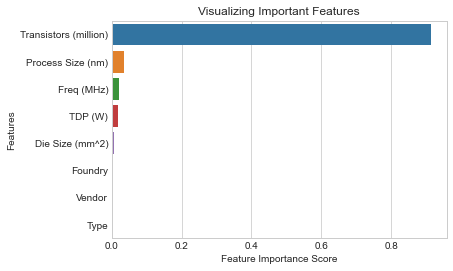

In [304]:
# feature importance
feature_importances = pd.DataFrame(final_model.feature_importances_, index = X_2.columns, columns=['importance']).sort_values('importance', ascending=False)
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [305]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_2, y_2, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [288.51645899 376.86981733 335.10271565 347.66523221 296.13589337
 294.89583596 293.97954111 250.93433954 267.04045176 290.27844398]
Mean cross-validation score: 304.14187299018215


In [306]:
# evaluate the model_forest using r2-score
print("Random Forest R2-score: " + str(r2_score(y_test2, y_pred2)))

Random Forest R2-score: 0.9425841453404173


In [307]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_forest.score(X_train2, y_train2)))
print("Test set MAE: " + str(-model_forest.score(X_test2, y_test2)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 196.83194406188264
Test set MAE: 338.6089964185486
Baseline MAE: 2295.8572134809638


In [308]:
# grid search for linear regression
lin_reg = LinearRegression()
param_grid = [
    {'fit_intercept': [True, False], 'copy_X': [True, False]},
]
model_lin = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_lin.fit(X_train2, y_train2)
print("Best parameters: " + str(model_lin.best_params_))
# show the best model's accuracy
cvres = model_lin.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_lin.best_estimator_
# predict the performance of GPU chips
y_pred2 = final_model.predict(X_test2)
print("Linear Regression final model MAE: " + str(mean_absolute_error(y_test2, y_pred2)))

Best parameters: {'copy_X': True, 'fit_intercept': True}
Mean test score: -795.4300035264007, Params: {'copy_X': True, 'fit_intercept': True}
Mean test score: -2334.5775457825266, Params: {'copy_X': True, 'fit_intercept': False}
Mean test score: -795.4300035264007, Params: {'copy_X': False, 'fit_intercept': True}
Mean test score: -2334.5775457825266, Params: {'copy_X': False, 'fit_intercept': False}
Linear Regression final model MAE: 814.6789179520082


In [309]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_2, y_2, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [ 757.86395951 1048.0370081   989.12452133  981.15040517  662.90781529
  749.9432388   860.2869148   656.64115637  711.50461535  900.93190525]
Mean cross-validation score: 831.8391539978813


In [310]:
# evaluate the model_lin using r2-score
print("Linear Regression R2-score: " + str(r2_score(y_test2, y_pred2)))

Linear Regression R2-score: 0.7163291839480401


In [311]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_lin.score(X_train2, y_train2)))
print("Test set MAE: " + str(-model_lin.score(X_test2, y_test2)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 785.2148935581187
Test set MAE: 814.6789179520082
Baseline MAE: 2295.8572134809638


In [312]:
# grid search for linear regression
svm_reg = SVR()
param_grid = [
    {'kernel': ['linear', 'rbf'], 'degree': [1, 3, 5], 'C': [0.1, 1.0, 10.0]},
]
model_svr = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_svr.fit(X_train2, y_train2)
print("Best parameters: " + str(model_svr.best_params_))
# show the best model's accuracy
cvres = model_svr.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_svr.best_estimator_
# predict the performance of GPU chips
y_pred2 = final_model.predict(X_test2)
print("Support Vector Regressor final model MAE: " + str(mean_absolute_error(y_test2, y_pred2)))

Best parameters: {'C': 10.0, 'degree': 1, 'kernel': 'linear'}
Mean test score: -1772.6943729325826, Params: {'C': 0.1, 'degree': 1, 'kernel': 'linear'}
Mean test score: -1900.0198388734916, Params: {'C': 0.1, 'degree': 1, 'kernel': 'rbf'}
Mean test score: -1772.6943729325826, Params: {'C': 0.1, 'degree': 3, 'kernel': 'linear'}
Mean test score: -1900.0198388734916, Params: {'C': 0.1, 'degree': 3, 'kernel': 'rbf'}
Mean test score: -1772.6943729325826, Params: {'C': 0.1, 'degree': 5, 'kernel': 'linear'}
Mean test score: -1900.0198388734916, Params: {'C': 0.1, 'degree': 5, 'kernel': 'rbf'}
Mean test score: -1274.3407652945205, Params: {'C': 1.0, 'degree': 1, 'kernel': 'linear'}
Mean test score: -1841.0433880581645, Params: {'C': 1.0, 'degree': 1, 'kernel': 'rbf'}
Mean test score: -1274.3407652945205, Params: {'C': 1.0, 'degree': 3, 'kernel': 'linear'}
Mean test score: -1841.0433880581645, Params: {'C': 1.0, 'degree': 3, 'kernel': 'rbf'}
Mean test score: -1274.3407652945205, Params: {'C': 1

In [314]:
# evaluate the model_svm using r2-score
print("Support Vector Regressor R2-score: " + str(r2_score(y_test2, y_pred2)))

Support Vector Regressor R2-score: 0.8060536845569012


In [315]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_svr.score(X_train2, y_train2)))
print("Test set MAE: " + str(-model_svr.score(X_test2, y_test2)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 795.6246456623079
Test set MAE: 705.6891690448479
Baseline MAE: 2295.8572134809638


In [316]:
# random search for neural network
nn_reg = MLPRegressor(max_iter=5000)
param_grid = [
    {'hidden_layer_sizes': [(100,), (100, 100)], 'solver': ['sgd'], 'activation': ['logistic', 'tanh'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'invscaling', 'adaptive']},
]
model_nn = RandomizedSearchCV(nn_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_nn.fit(X_train2, y_train2)
print("Best parameters: " + str(model_nn.best_params_))
# show the best model's accuracy
cvres = model_nn.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_nn.best_estimator_
# predict the performance of GPU chips
y_pred2 = final_model.predict(X_test2)
print("Neural Network final model MAE: " + str(mean_absolute_error(y_test2, y_pred2)))

c:\Users\kevvk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kevvk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kevvk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kevvk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kevvk\anaconda3\lib\site-packages\sklearn\neural_network\_m

Best parameters: {'solver': 'sgd', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'tanh'}
Mean test score: -610.7899041593073, Params: {'solver': 'sgd', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'tanh'}
Mean test score: -892.9002863301785, Params: {'solver': 'sgd', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100, 100), 'alpha': 0.05, 'activation': 'tanh'}
Mean test score: -1330.157426301187, Params: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 0.0001, 'activation': 'tanh'}
Mean test score: -721.7365047737343, Params: {'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'logistic'}
Mean test score: -648.6786158643743, Params: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'logistic'}
Mean test score: -2378.604789504979, Params: {

In [317]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_2, y_2, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

c:\Users\kevvk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores: [2978.30931917 2768.9171383  2374.70508504 2634.67556146 2420.24828316
 2098.62305171 2640.78597925 1954.96456116 2355.72076809 2416.08814742]
Mean cross-validation score: 2464.3037894756235


In [318]:
# evaluate the model_nn using r2-score
print("Neural Network R2-score: " + str(r2_score(y_test2, y_pred2)))

Neural Network R2-score: 0.8250859519377411


In [319]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_nn.score(X_train2, y_train2)))
print("Test set MAE: " + str(-model_nn.score(X_test2, y_test2)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 688.9575295490085
Test set MAE: 647.4616443381168
Baseline MAE: 2295.8572134809638


In [320]:
# random search for gradient boosting
gb_reg = GradientBoostingRegressor()
param_grid = [
    {'n_estimators': [100, 500, 1000], 'max_depth': [1, 3, 5], 'learning_rate': [0.1, 0.01, 0.001], 'max_features': ['auto', 'sqrt']},
]
model_gb = RandomizedSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_gb.fit(X_train2, y_train2)
print("Best parameters: " + str(model_gb.best_params_))
# show the best model's accuracy
cvres = model_gb.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_gb.best_estimator_
# predict the performance of GPU chips
y_pred2 = final_model.predict(X_test2)
print("Gradient Boosting final model MAE: " + str(mean_absolute_error(y_test2, y_pred2)))

Best parameters: {'n_estimators': 1000, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}
Mean test score: -537.9183937214931, Params: {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 1, 'learning_rate': 0.01}
Mean test score: -2220.233660662888, Params: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.001}
Mean test score: -305.15477658172654, Params: {'n_estimators': 1000, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}
Mean test score: -339.9343010958586, Params: {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 3, 'learning_rate': 0.01}
Mean test score: -472.07793617019763, Params: {'n_estimators': 500, 'max_features': 'auto', 'max_depth': 1, 'learning_rate': 0.1}
Mean test score: -640.3922933211472, Params: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 1, 'learning_rate': 0.1}
Mean test score: -1666.6536992017525, Params: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 3, 'learni

In [321]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_2, y_2, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [232.12094505 310.3512309  316.7569488  352.41095925 263.00114596
 204.79772254 339.9944007  256.5189116  241.96888097 222.31663052]
Mean cross-validation score: 274.02377762910646


In [322]:
# evaluate the model_gb using r2-score
print("Gradient Boosting R2-score: " + str(r2_score(y_test2, y_pred2)))

Gradient Boosting R2-score: 0.9622813772591496


In [323]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_gb.score(X_train2, y_train2)))
print("Test set MAE: " + str(-model_gb.score(X_test2, y_test2)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 54.51379386501092
Test set MAE: 291.2356372644608
Baseline MAE: 2295.8572134809638


# Case Study 3: Predicting The Performance Of CPU's Using Frequency and Transistors (multi-output regression)

In [324]:
chips_cpu.isna().sum()

Type                        0
Release Date                0
Process Size (nm)           0
TDP (W)                     0
Die Size (mm^2)             0
Transistors (million)       0
Freq (MHz)                  0
Foundry                     0
Vendor                      0
FP16 GFLOPS              1878
FP32 GFLOPS              1878
FP64 GFLOPS              1878
dtype: int64

In [325]:
# split the data into training and testing sets
X_3 = chips_cpu[['Type', 'Vendor', 'Foundry', 'Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)']]
y_3 = chips_cpu[['Transistors (million)', 'Freq (MHz)']]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)
# scale the data using StandardScaler
scaler2 = StandardScaler()
X_train3 = scaler2.fit_transform(X_train3)
X_test3 = scaler2.transform(X_test3)

In [326]:
# define a baseline regression model and find the performance using MAE
baseline_model = DummyRegressor(strategy="mean")
baseline_model.fit(X_train3, y_train3)
y_pred3 = baseline_model.predict(X_test3)
baseline_mae = mean_absolute_error(y_test3, y_pred3)
print("Baseline MAE: " + str(baseline_mae))

Baseline MAE: 861.7812580768804


In [327]:
# r2-score for baseline model
print("Baseline R2-score: " + str(r2_score(y_test3, y_pred3)))

Baseline R2-score: -0.0015374539568348


In [328]:
# grid search for decision tree
tree_reg = DecisionTreeRegressor()
param_grid = [
    {'max_depth': [1, 3, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5], 'max_features': [3, 5, 6]},
]
model_tree = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_tree.fit(X_train3, y_train3)
print("Best parameters: " + str(model_tree.best_params_))
# show the best model's accuracy
cvres = model_tree.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_tree.best_estimator_
# predict the performance of CPU chips
y_pred3 = final_model.predict(X_test3)
print("Decision Tree final model MAE: " + str(mean_absolute_error(y_test3, y_pred3)))


Best parameters: {'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean test score: -761.415435530262, Params: {'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean test score: -788.3483924672739, Params: {'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean test score: -771.1251828353069, Params: {'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean test score: -780.7101098620082, Params: {'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Mean test score: -804.2534606056568, Params: {'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}
Mean test score: -761.059141231561, Params: {'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10}
Mean test score: -821.7322455857815, Params: {'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mean

In [329]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_3, y_3, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [366.25983376 360.48754114 381.96631371 420.83791828 366.03466662
 402.76885171 380.93276622 385.21607392 346.16886266 365.09553352]
Mean cross-validation score: 377.57683615330416


In [330]:
# evaluate the model_tree using r2-score
print("Decision Tree R2-score: " + str(r2_score(y_test3, y_pred3)))

Decision Tree R2-score: 0.7122805601059297


In [331]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_tree.score(X_train3, y_train3)))
print("Test set MAE: " + str(-model_tree.score(X_test3, y_test3)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 357.1402454810402
Test set MAE: 368.73310624120575
Baseline MAE: 861.7812580768804


In [358]:
# grid search for decision tree
forest_reg = RandomForestRegressor()
param_grid = [
    {'n_estimators': [100, 500, 1000], 'max_depth': [1, 3, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5], 'max_features': ['auto', 'sqrt']},
]
model_forest = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_forest.fit(X_train3, y_train3)
print("Best parameters: " + str(model_forest.best_params_))
# show the best model's accuracy
cvres = model_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_forest.best_estimator_
# predict the performance of CPU chips
y_pred3 = final_model.predict(X_test3)
print("Random Forest final model MAE: " + str(mean_absolute_error(y_test3, y_pred3)))


Best parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Mean test score: -719.5652759117041, Params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean test score: -713.0517293338124, Params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Mean test score: -714.3032129720548, Params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Mean test score: -719.5913304518755, Params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean test score: -716.5263460416294, Params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean test score: -713.4757052553869, Params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf

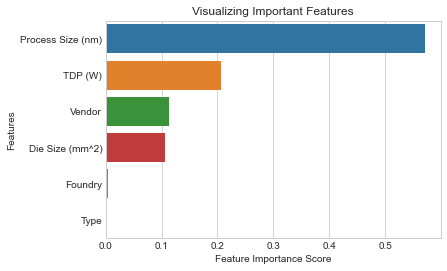

In [359]:
# feature importance
feature_importances = pd.DataFrame(final_model.feature_importances_, index = X_3.columns, columns=['importance']).sort_values('importance', ascending=False)
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [360]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_3, y_3, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [333.90312577 345.27233309 365.24729788 370.88862942 338.81905005
 370.42483339 334.94043381 349.61146217 323.55343006 343.27325681]
Mean cross-validation score: 347.5933852449706


In [361]:
# evaluate the model_forest using r2-score
print("Random Forest R2-score: " + str(r2_score(y_test3, y_pred3)))

Random Forest R2-score: 0.7351084164493846


In [362]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_forest.score(X_train3, y_train3)))
print("Test set MAE: " + str(-model_forest.score(X_test3, y_test3)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 323.2621395184141
Test set MAE: 347.7115725074459
Baseline MAE: 861.7812580768804


In [336]:
# grid search for linear regression
lin_reg = LinearRegression()
param_grid = [
    {'fit_intercept': [True, False], 'copy_X': [True, False]},
]
model_lin = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_lin.fit(X_train3, y_train3)
print("Best parameters: " + str(model_lin.best_params_))
# show the best model's accuracy
cvres = model_lin.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_lin.best_estimator_
# predict the performance of CPU chips
y_pred3 = final_model.predict(X_test3)
print("Linear final model MAE: " + str(mean_absolute_error(y_test3, y_pred3)))

Best parameters: {'copy_X': True, 'fit_intercept': True}
Mean test score: -626.2175823397595, Params: {'copy_X': True, 'fit_intercept': True}
Mean test score: -1942.805198558203, Params: {'copy_X': True, 'fit_intercept': False}
Mean test score: -626.2175823397595, Params: {'copy_X': False, 'fit_intercept': True}
Mean test score: -1942.805198558203, Params: {'copy_X': False, 'fit_intercept': False}
Linear final model MAE: 637.9547042538333


In [337]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_3, y_3, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [662.21889926 606.53964891 586.9096501  606.7796936  641.17569981
 644.94293893 599.13033018 594.7113269  639.81489847 701.77309899]
Mean cross-validation score: 628.3996185144365


In [338]:
# evaluate the model_lin using r2-score
print("Linear R2-score: " + str(r2_score(y_test3, y_pred3)))

Linear R2-score: 0.3704079167118282


In [339]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_lin.score(X_train3, y_train3)))
print("Test set MAE: " + str(-model_lin.score(X_test3, y_test3)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 620.9916775317538
Test set MAE: 637.9547042538333
Baseline MAE: 861.7812580768804


In [340]:
# grid search for ridge regression
ridge_reg = Ridge()
param_grid = [
    {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
]
model_ridge = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_ridge.fit(X_train3, y_train3)
print("Best parameters: " + str(model_ridge.best_params_))
# show the best model's accuracy
cvres = model_ridge.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_ridge.best_estimator_
# predict the performance of CPU chips
y_pred3 = final_model.predict(X_test3)
print("Ridge final model MAE: " + str(mean_absolute_error(y_test3, y_pred3)))


Best parameters: {'alpha': 10.0, 'solver': 'auto'}
Mean test score: -626.2028005227996, Params: {'alpha': 0.1, 'solver': 'auto'}
Mean test score: -626.2028005227996, Params: {'alpha': 0.1, 'solver': 'svd'}
Mean test score: -626.2028005227996, Params: {'alpha': 0.1, 'solver': 'cholesky'}
Mean test score: -626.2111263391437, Params: {'alpha': 0.1, 'solver': 'lsqr'}
Mean test score: -626.2028005227996, Params: {'alpha': 0.1, 'solver': 'sparse_cg'}
Mean test score: -626.2596124307113, Params: {'alpha': 0.1, 'solver': 'sag'}
Mean test score: -626.2265762683074, Params: {'alpha': 0.1, 'solver': 'saga'}
Mean test score: -626.0701757920112, Params: {'alpha': 1.0, 'solver': 'auto'}
Mean test score: -626.070175792011, Params: {'alpha': 1.0, 'solver': 'svd'}
Mean test score: -626.0701757920112, Params: {'alpha': 1.0, 'solver': 'cholesky'}
Mean test score: -626.0784295213598, Params: {'alpha': 1.0, 'solver': 'lsqr'}
Mean test score: -626.0701757920112, Params: {'alpha': 1.0, 'solver': 'sparse_cg'}

In [341]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_3, y_3, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [659.97888709 606.02704124 585.45198364 607.64347264 639.89077691
 644.08383501 599.66041923 593.02807185 639.60836919 701.79421823]
Mean cross-validation score: 627.7167075022703


In [342]:
# evaluate the model_ridge using r2-score
print("Ridge R2-score: " + str(r2_score(y_test3, y_pred3)))

Ridge R2-score: 0.3705451496636546


In [343]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_ridge.score(X_train3, y_train3)))
print("Test set MAE: " + str(-model_ridge.score(X_test3, y_test3)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 619.6663810914129
Test set MAE: 636.6709141448069
Baseline MAE: 861.7812580768804


In [344]:
# grid search for lasso regression
lasso_reg = Lasso()
param_grid = [
    {'alpha': [0.1, 1.0, 10.0], 'selection': ['cyclic', 'random']},
]
model_lasso = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_lasso.fit(X_train3, y_train3)
print("Best parameters: " + str(model_lasso.best_params_))
# show the best model's accuracy
cvres = model_lasso.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_lasso.best_estimator_
# predict the performance of CPU chips
y_pred3 = final_model.predict(X_test3)
print("Lasso final model MAE: " + str(mean_absolute_error(y_test3, y_pred3)))

Best parameters: {'alpha': 10.0, 'selection': 'random'}
Mean test score: -626.2026078668184, Params: {'alpha': 0.1, 'selection': 'cyclic'}
Mean test score: -626.2027319713088, Params: {'alpha': 0.1, 'selection': 'random'}
Mean test score: -626.0880350151496, Params: {'alpha': 1.0, 'selection': 'cyclic'}
Mean test score: -626.0831785636752, Params: {'alpha': 1.0, 'selection': 'random'}
Mean test score: -625.4664996119834, Params: {'alpha': 10.0, 'selection': 'cyclic'}
Mean test score: -625.4629620237531, Params: {'alpha': 10.0, 'selection': 'random'}
Lasso final model MAE: 635.6030977286387


In [345]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_3, y_3, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [660.00799499 606.75347113 584.28400505 608.75665259 637.83940137
 643.47688457 599.75738202 593.51029385 640.66269607 701.69457354]
Mean cross-validation score: 627.67433551922


In [346]:
# evaluate the model_lasso using r2-score
print("Lasso R2-score: " + str(r2_score(y_test3, y_pred3)))

Lasso R2-score: 0.37302226399774474


In [347]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_lasso.score(X_train3, y_train3)))
print("Test set MAE: " + str(-model_lasso.score(X_test3, y_test3)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 620.1125724527571
Test set MAE: 635.6030977286387
Baseline MAE: 861.7812580768804


In [348]:
# grid search for elastic net
elastic_net = ElasticNet()
param_grid = [
    {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9], 'selection': ['cyclic', 'random']},
]
model_elastic = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_elastic.fit(X_train3, y_train3)
print("Best parameters: " + str(model_elastic.best_params_))
# show the best model's accuracy
cvres = model_elastic.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_elastic.best_estimator_
# predict the performance of CPU chips
y_pred3 = final_model.predict(X_test3)
print("Elastic final model MAE: " + str(mean_absolute_error(y_test3, y_pred3)))

Best parameters: {'alpha': 0.1, 'l1_ratio': 0.9, 'selection': 'random'}
Mean test score: -631.6280823961339, Params: {'alpha': 0.1, 'l1_ratio': 0.1, 'selection': 'cyclic'}
Mean test score: -631.6280284916284, Params: {'alpha': 0.1, 'l1_ratio': 0.1, 'selection': 'random'}
Mean test score: -625.4820086505022, Params: {'alpha': 0.1, 'l1_ratio': 0.5, 'selection': 'cyclic'}
Mean test score: -625.4823833952144, Params: {'alpha': 0.1, 'l1_ratio': 0.5, 'selection': 'random'}
Mean test score: -624.6050513983164, Params: {'alpha': 0.1, 'l1_ratio': 0.9, 'selection': 'cyclic'}
Mean test score: -624.601784840268, Params: {'alpha': 0.1, 'l1_ratio': 0.9, 'selection': 'random'}
Mean test score: -692.099842345249, Params: {'alpha': 1.0, 'l1_ratio': 0.1, 'selection': 'cyclic'}
Mean test score: -692.0998231286915, Params: {'alpha': 1.0, 'l1_ratio': 0.1, 'selection': 'random'}
Mean test score: -667.7579941958793, Params: {'alpha': 1.0, 'l1_ratio': 0.5, 'selection': 'cyclic'}
Mean test score: -667.75859921

In [349]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_3, y_3, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [658.49556854 605.69005251 584.46665052 608.23283097 639.01269214
 643.4997509  600.01680322 591.90369584 639.47991447 701.80662453]
Mean cross-validation score: 627.2604583651312


In [350]:
# evaluate the model_elastic using r2-score
print("Elastic R2-score: " + str(r2_score(y_test3, y_pred3)))

Elastic R2-score: 0.3705127650523338


In [351]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_elastic.score(X_train3, y_train3)))
print("Test set MAE: " + str(-model_elastic.score(X_test3, y_test3)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 619.0223009895267
Test set MAE: 636.0343415735517
Baseline MAE: 861.7812580768804


In [352]:
# grid search for neural network
mlp_reg = MLPRegressor(max_iter=2500)
param_grid = [
    {'hidden_layer_sizes': [(100,), (100, 100)], 'solver': ['sgd'], 'activation': ['logistic', 'tanh'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'invscaling', 'adaptive']},
]
model_mlp = GridSearchCV(mlp_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
model_mlp.fit(X_train3, y_train3)
print("Best parameters: " + str(model_mlp.best_params_))
# show the best model's accuracy
cvres = model_mlp.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("Mean test score: " + str(mean_score) + ", Params: " + str(params))
# build the final model
final_model = model_mlp.best_estimator_
# predict the performance of CPU chips
y_pred3 = final_model.predict(X_test3)
print("Neural network final model MAE: " + str(mean_absolute_error(y_test3, y_pred3)))

c:\Users\kevvk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Mean test score: -807.8329066950894, Params: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
Mean test score: -1623.1790355262976, Params: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'solver': 'sgd'}
Mean test score: -779.5947154403013, Params: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Mean test score: -879.2183439450779, Params: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}
Mean test score: -1835.322970559105, Params: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'solver': 'sgd'}
Mean test score: -873.1890627

c:\Users\kevvk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [353]:
# evaluate the model using cross-validation
scores = -cross_val_score(final_model, X_3, y_3, scoring="neg_mean_absolute_error", cv=10)
print("Cross-validation scores: " + str(scores))
print("Mean cross-validation score: " + str(scores.mean()))

Cross-validation scores: [932.76860975 828.07829079 925.81478877 895.98890475 858.62742418
 794.51592032 855.7600079  909.27300284 878.65657523 930.24021602]
Mean cross-validation score: 880.9723740564428


In [354]:
# evaluate the model_mlp using r2-score
print("Neural network R2-score: " + str(r2_score(y_test3, y_pred3)))

Neural network R2-score: 0.6148385292367805


In [355]:
# score on the training set and the test set
print("Training set MAE: " + str(-model_mlp.score(X_train3, y_train3)))
print("Test set MAE: " + str(-model_mlp.score(X_test3, y_test3)))
print("Baseline MAE: " + str(baseline_mae))

Training set MAE: 400.6964204665212
Test set MAE: 445.4555745446814
Baseline MAE: 861.7812580768804
